<a href="https://colab.research.google.com/github/dairo117/Challenger---Telecom-X---Dairo-Mart-nez/blob/main/Challenger_TelecomX_Parte_2_DairoMart%C3%ADnez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Telecom X – Parte 2: Predicción de Cancelación (Churn - Retirado)** ##

El presente proyecto constituye la segunda fase del análisis realizado para la empresa Telecom X. En la primera parte (Telecom X – Parte 1) se abordó el estudio exploratorio del fenómeno de **cancelación de clientes** *(churn)*, con el fin de identificar las principales causas de la pérdida de usuarios.

Este análisis fue especialmente relevante, ya que la compañía enfrenta una tasa de abandono cercana al **27%**, un nivel crítico que compromete directamente la sostenibilidad del negocio: menos clientes significan menos ingresos, y la adquisición de nuevos usuarios suele ser más costosa que la retención de los actuales.

Durante la primera fase se aplicaron técnicas de **ETL (Extracción, Transformación y Carga)** y análisis exploratorio, centrando la atención en la variable **Retiro (Churn)** en relación con factores como tiempo de contrato, tipo de servicios contratados, métodos de pago y gastos asociados.

Los hallazgos principales mostraron que el **abandono ocurre mayoritariamente en los primeros meses del servicio (entre el 1 y el 10)**, que los **contratos mensuales presentan una tasa de deserción muy superior a los contratos anuales o bianuales**, y que ciertos servicios como: la fibra óptica, los paquetes de televisión y películas, la facturación electrónica, entre otros, están vinculados a mayores niveles de cancelación, probablemente debido a una percepción de menor valor o calidad. Asimismo, se observó que los clientes con **bajo gasto total** y quienes **no contratan servicios adicionales de seguridad o soporte técnico** tienen una mayor propensión a **retirarse**.

![Descripción opcional](https://drive.google.com/uc?export=view&id=1PhN_Dlt2jZq3bZmU5lsY6x2L0Tq9BbUK)

A partir de estos resultados se recomendaron acciones estratégicas, entre ellas: fortalecer la experiencia del cliente en los primeros meses de contrato, incentivar planes de mayor permanencia mediante beneficios, diseñar programas de retención para quienes utilizan pagos electrónicos, revisar la propuesta de valor de los servicios complementarios y promover activamente servicios de soporte y seguridad.

*Nota*: Para mayor profundización acerca de lo expuesto anteriormente, entrar al siguiente link: https://github.com/dairo117/Challenger---Telecom-X---Dairo-Mart-nez


### **Objetivo de la Parte 2** ###

En esta nueva etapa, el propósito es desarrollar **modelos de Machine Learning** capaces de **predecir qué clientes tienen mayor probabilidad de cancelar sus servicios**, con el fin de que la empresa pueda anticiparse al problema de la cancelación y diseñar estrategias de retención más efectivas.

#### **Objetivos específicos** ####

* Preparar los datos para el modelado (tratamiento, codificación y normalización).

* Realizar análisis de correlación y selección de variables relevantes.

* Entrenar dos o más modelos de clasificación con enfoques distintos.

* Evaluar el rendimiento de los modelos utilizando métricas de clasificación.

* Interpretar los resultados, incluyendo la importancia relativa de las variables.

* Elaborar una conclusión estratégica que resuma los factores que influyen en la cancelación y proponga líneas de acción.

#### **Extracción del Archivo Tratado** ####

Para el desarrollo de esta fase del proyecto se utilizó el archivo previamente procesado en la Parte 1, denominado *datos_tratados.csv*. Este archivo contiene únicamente las columnas limpias, transformadas y estandarizadas, lo que permite iniciar directamente la fase de modelado sin necesidad de aplicar un nuevo preprocesamiento profundo.

El dataset servirá como base tanto para la exploración dirigida de variables como para la construcción de modelos predictivos de cancelación (churn - Retirado).

Además, se importaron las librerías necesarias para el análisis, visualización y modelado, entre ellas pandas, seaborn, matplotlib, y diversos módulos de scikit-learn para la construcción y evaluación de modelos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_validate

Antes de realizar cualquier modificación, se efectuó una exploración preliminar del dataset con el fin de comprender su estructura y contenido.

**1. Muestra aleatoria de registros:** Con la función *sample()* se visualizaron algunos registros seleccionados al azar, lo cual permitió revisar ejemplos concretos y comprobar que los datos mantienen coherencia con lo esperado.

**2. Tipos de datos y valores nulos:** Mediante la función *info()* se identificaron los tipos de cada variable (numéricas, categóricas o booleanas) y se verificó la existencia de valores nulos. Este paso resulta clave para anticipar posibles procesos de tratamiento adicionales.

**3. Estadísticos descriptivos:**

* Con ***describe()*** se calcularon medidas estadísticas básicas de las variables numéricas (media, mediana, desviación estándar, valores mínimos y máximos, y cuartiles).
    
* Con ***describe(include="O")*** se obtuvieron estadísticas descriptivas de las variables categóricas, como número de categorías, frecuencia de la categoría más común y su proporción en el total de registros.

En conjunto, esta exploración inicial ofreció una primera visión del dataset y facilitó la comprensión de las variables disponibles para el modelado.

In [2]:
archivo = "/content/datos_tratados.csv"

df_telecom = pd.read_csv(archivo)

In [3]:
df_telecom.sample(5)

,Id_cliente,Retirado,Genero,Adulto_mayor,Emparejado,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas_telefonicas,Servicio_internet,...,Proteccion_dispositivo,Soporte_tecnico,Servicio_tv,Servicio_peliculas,Contrato,Factura_electronica,Metodo_pago,Total_mensual,Total_gastado,Cuentas_diarias
5517,7771-CFQRQ,No,Female,0,Yes,Yes,47,Yes,No,DSL,...,No,Yes,No,Yes,two year,No,bank transfer automatic,63.80,3007.25,2.097304
2133,3063-QFSZL,Yes,Female,0,No,No,1,Yes,No,DSL,...,No,No,No,Yes,month to month,Yes,electronic check,55.40,55.40,1.821170
1997,2883-ILGWO,No,Male,1,No,No,57,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,month to month,Yes,bank transfer automatic,104.90,5913.95,3.448389
1337,1987-AUELQ,No,Female,0,Yes,No,71,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,two year,No,credit card automatic,25.05,1873.70,0.823471
214,0329-GTIAJ,Yes,Female,0,No,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,Yes,month to month,Yes,electronic check,97.90,315.30,3.218277


In [4]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id_cliente                    7043 non-null   object 
 1   Retirado                      7043 non-null   object 
 2   Genero                        7043 non-null   object 
 3   Adulto_mayor                  7043 non-null   int64  
 4   Emparejado                    7043 non-null   object 
 5   Dependientes                  7043 non-null   object 
 6   Meses_contrato                7043 non-null   int64  
 7   Servicio_telefonico           7043 non-null   object 
 8   Multiples_lineas_telefonicas  7043 non-null   object 
 9   Servicio_internet             7043 non-null   object 
 10  Seguridad_online              7043 non-null   object 
 11  Respaldo_online               7043 non-null   object 
 12  Proteccion_dispositivo        7043 non-null   object 
 13  Sop

In [5]:
df_telecom.describe()

,Adulto_mayor,Meses_contrato,Total_mensual,Total_gastado,Cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.128918
std,0.368612,24.559481,30.090047,2266.771362,0.989153
min,0.000000,0.000000,18.250000,18.800000,0.599934
25%,0.000000,9.000000,35.500000,401.450000,1.166995
50%,0.000000,29.000000,70.350000,1397.475000,2.312623
75%,0.000000,55.000000,89.850000,3794.737500,2.953649
max,1.000000,72.000000,118.750000,8684.800000,3.903682


In [6]:
df_telecom.describe(include="O")

,Id_cliente,Retirado,Genero,Emparejado,Dependientes,Servicio_telefonico,Multiples_lineas_telefonicas,Servicio_internet,Seguridad_online,Respaldo_online,Proteccion_dispositivo,Soporte_tecnico,Servicio_tv,Servicio_peliculas,Contrato,Factura_electronica,Metodo_pago
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,month to month,Yes,electronic check
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


El análisis descriptivo del dataset muestra que las variables numéricas presentan una alta variabilidad, destacándose que muchos clientes tienen pocos meses de contrato y bajo gasto acumulado, mientras que un grupo reducido concentra valores muy altos. En cuanto a las variables categóricas, se observa que la mayoría de clientes cuentan con servicio telefónico e internet (principalmente fibra óptica), aunque pocos contratan servicios adicionales como seguridad o respaldo. La variable objetivo *Retirado* confirma una proporción cercana al 27% de cancelaciones, lo que refleja un desbalance de clases a tener en cuenta en el modelado.

**Eliminación de Columnas Irrelevantes**

En esta etapa se eliminan aquellas columnas que no aportan información significativa para la construcción de los modelos predictivos. La presencia de variables irrelevantes o redundantes puede afectar negativamente el rendimiento de los algoritmos, generando ruido o incrementando innecesariamente la complejidad del modelo.

En este caso, se eliminó la columna ***Id_cliente***, ya que corresponde únicamente a un identificador único de cada registro. Este tipo de variables no contienen patrones útiles ni aportan valor explicativo para la predicción de la cancelación de clientes.

Respecto a la variable ***Genero***, aunque en la fase exploratoria de la Parte 1 se evidenció que no presenta una relación clara con la deserción de clientes, se ha decidido mantenerla temporalmente en el dataset. Posteriormente, durante el análisis de correlación y selección de variables, se evaluará de manera objetiva su contribución real al modelo. En caso de confirmarse su baja relevancia, se procederá a descartarla en la etapa de depuración final de variables.

In [7]:
#Eliminación columna "Id_cliente"

df_telecom_modificado = df_telecom.drop(columns="Id_cliente",axis=1)
df_telecom_modificado.head(2)

,Retirado,Genero,Adulto_mayor,Emparejado,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas_telefonicas,Servicio_internet,Seguridad_online,...,Proteccion_dispositivo,Soporte_tecnico,Servicio_tv,Servicio_peliculas,Contrato,Factura_electronica,Metodo_pago,Total_mensual,Total_gastado,Cuentas_diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,one year,Yes,mailed check,65.6,593.3,2.156476
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,month to month,No,mailed check,59.9,542.4,1.969099


### **Encoding** ###

Dado que los algoritmos de Machine Learning requieren trabajar con datos numéricos, es necesario codificar las variables categóricas presentes en el dataset. En este caso, variables como: Género, Emparejado, Dependientes, Servicio telefónico, Múltiples líneas telefónicas, Servicio de internet, Método de pago y otras de tipo *Sí/No* o con varias categorías deben transformarse en representaciones numéricas.

Dado que los algoritmos de Machine Learning requieren trabajar únicamente con datos numéricos, es necesario codificar las variables categóricas presentes en el dataset. Al revisar la información con la función *info()*, se observa que varias columnas se encuentran en formato *object*, lo cual impide su uso directo en los modelos.

**Identificación de variables categóricas**

Se listaron las columnas cualitativas del dataset y, mediante una función auxiliar, se verificaron sus categorías y tipos de datos

In [8]:
def tipo_dato(df,columna):
    return print(f"La columna '{columna}' es de tipo ({df[columna].dtype}), y tiene los siguientes elementos: {df[columna].unique()}")

columnas_variables_categoricas = [
    "Retirado","Genero","Emparejado","Dependientes","Servicio_telefonico",
    "Multiples_lineas_telefonicas","Servicio_internet","Seguridad_online",
    "Respaldo_online","Proteccion_dispositivo","Soporte_tecnico","Servicio_tv",
    "Servicio_peliculas","Contrato","Factura_electronica","Metodo_pago"
]

for i in columnas_variables_categoricas:
    tipo_dato(df_telecom_modificado,i)


La columna 'Retirado' es de tipo (object), y tiene los siguientes elementos: ['No' 'Yes']
La columna 'Genero' es de tipo (object), y tiene los siguientes elementos: ['Female' 'Male']
La columna 'Emparejado' es de tipo (object), y tiene los siguientes elementos: ['Yes' 'No']
La columna 'Dependientes' es de tipo (object), y tiene los siguientes elementos: ['Yes' 'No']
La columna 'Servicio_telefonico' es de tipo (object), y tiene los siguientes elementos: ['Yes' 'No']
La columna 'Multiples_lineas_telefonicas' es de tipo (object), y tiene los siguientes elementos: ['No' 'Yes' 'No phone service']
La columna 'Servicio_internet' es de tipo (object), y tiene los siguientes elementos: ['DSL' 'Fiber optic' 'No']
La columna 'Seguridad_online' es de tipo (object), y tiene los siguientes elementos: ['No' 'Yes' 'No internet service']
La columna 'Respaldo_online' es de tipo (object), y tiene los siguientes elementos: ['Yes' 'No' 'No internet service']
La columna 'Proteccion_dispositivo' es de tipo (o

Este análisis confirmó que existen variables binarias simples (Yes/No), otras con categorías adicionales como *No internet service* o *No phone service*, y algunas multiclase como *Servicio de internet*, *Contrato* y *Método de pago*.

**Codificación de variables binarias**

Para las variables binarias se utilizó la función *replace()*, transformando:

* Yes → 1, No → 0

* Valores como “No internet service” o “No phone service” también se mapearon como 0, dado que en la práctica representan ausencia del servicio.

In [9]:
for i in columnas_variables_categoricas:
    df_telecom_modificado[i] = df_telecom_modificado[i].replace({"No":0,"Yes":1,"No internet service":0})

df_telecom_modificado["Multiples_lineas_telefonicas"] = df_telecom_modificado["Multiples_lineas_telefonicas"].replace({"No":0,"Yes":1,"No phone service":0})

/tmp/ipython-input-2896915494.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom_modificado[i] = df_telecom_modificado[i].replace({"No":0,"Yes":1,"No internet service":0})
/tmp/ipython-input-2896915494.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom_modificado["Multiples_lineas_telefonicas"] = df_telecom_modificado["Multiples_lineas_telefonicas"].replace({"No":0,"Yes":1,"No phone service":0})


**Codificación de variables multiclase**

Las variables con más de dos categorías se codificaron mediante *one-hot encoding* usando ***pd.get_dummies()***. Este método crea nuevas columnas binarias para cada categoría, evitando que el modelo interprete un orden inexistente entre ellas.

In [10]:
df_telecom_codificado = pd.get_dummies(data=df_telecom_modificado,columns=["Genero","Servicio_internet","Contrato","Metodo_pago"],dtype=int)
df_telecom_codificado.sample(5)

,Retirado,Adulto_mayor,Emparejado,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas_telefonicas,Seguridad_online,Respaldo_online,Proteccion_dispositivo,...,Servicio_internet_0,Servicio_internet_DSL,Servicio_internet_Fiber optic,Contrato_month to month,Contrato_one year,Contrato_two year,Metodo_pago_bank transfer automatic,Metodo_pago_credit card automatic,Metodo_pago_electronic check,Metodo_pago_mailed check
3243,1,0,1,1,13,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6196,0,0,1,1,27,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
6582,0,0,0,0,67,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
1082,0,0,0,0,4,1,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
5246,0,0,0,0,20,0,0,1,1,1,...,0,1,0,1,0,0,0,1,0,0


Con este procedimiento, todas las variables categóricas fueron convertidas a formato numérico, lo cual garantiza la compatibilidad del dataset con los algoritmos de Machine Learning y permite continuar con las etapas de análisis de correlación y modelado predictivo.

#### **Verificación de la Proporción de Cancelación (Churn)** ####

Un paso fundamental antes del modelado es conocer la proporción de clientes que permanecen frente a aquellos que cancelan el servicio. Esta verificación permite identificar si existe un desbalance de clases, aspecto que puede afectar el desempeño de los modelos de clasificación.

Para ello, se calcularon las frecuencias de la variable **Retirado** y se representaron de forma gráfica, comparando visualmente el número de clientes activos y cancelados. Esta visualización facilita comprender la magnitud del problema de la deserción y evaluar la necesidad de aplicar técnicas de balanceo de clases en las etapas posteriores.

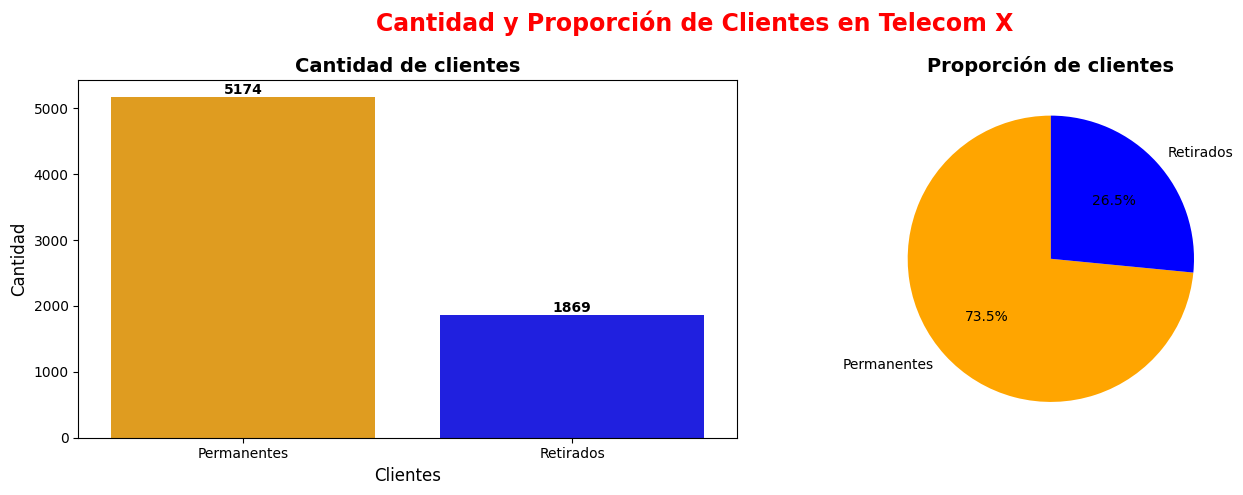

In [45]:
conteo = df_telecom_codificado["Retirado"].value_counts()
proporcion = df_telecom_codificado["Retirado"].value_counts(normalize=True)


fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Cantidad y Proporción de Clientes en Telecom X", fontsize=17,fontweight="bold",color="r")

sns.countplot(data=df_telecom_codificado,x="Retirado",hue="Retirado",legend=False,palette=["orange", "blue"],ax=axes[0])
axes[0].set_title("Cantidad de clientes", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Clientes", fontsize=12)
axes[0].set_ylabel("Cantidad", fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Permanentes", "Retirados"])

for i, j in enumerate(conteo.values):
    axes[0].text(i, j + 0.5, str(j), ha='center', va='bottom', fontsize=10, fontweight="bold")


axes[1].pie(proporcion.values,labels=["Permanentes", "Retirados"],autopct="%1.1f%%",startangle=90,colors=["orange", "blue"],)
axes[1].set_title("Proporción de clientes", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()


Los resultados muestran que existe un porcentaje considerable de clientes que se retiran de Telecom X, lo que confirma la importancia de abordar el problema del churn. Esta distribución también revela un desbalance de clases en la variable objetivo, donde la cantidad de clientes que permanecen es significativamente mayor a la de los que cancelan. Este aspecto debe tenerse en cuenta en la fase de modelado, ya que puede afectar el rendimiento de los algoritmos de clasificación y requerir el uso de técnicas de balanceo.

### **Análisis de Correlación** ###

Con el fin de identificar las relaciones existentes entre las variables numéricas del dataset, se generó una matriz de correlación. Este análisis permite detectar qué variables presentan una mayor asociación entre sí y, especialmente, con la variable objetivo Retirado.

La correlación es una herramienta útil en la fase de selección de variables, ya que aquellas que muestran una relación más fuerte con la cancelación pueden convertirse en candidatas clave para el modelo predictivo. Al mismo tiempo, este análisis permite advertir posibles casos de multicolinealidad entre predictores, lo cual debe considerarse para evitar redundancia o inestabilidad en los modelos.

In [12]:
correlacion= df_telecom_codificado.corr()
correlacion["Retirado"]

,Retirado
Retirado,1.000000
Adulto_mayor,0.150889
Emparejado,-0.150448
Dependientes,-0.164221
Meses_contrato,-0.352229
Servicio_telefonico,0.011942
Multiples_lineas_telefonicas,0.040102
Seguridad_online,-0.171226
Respaldo_online,-0.082255
Proteccion_dispositivo,-0.066160


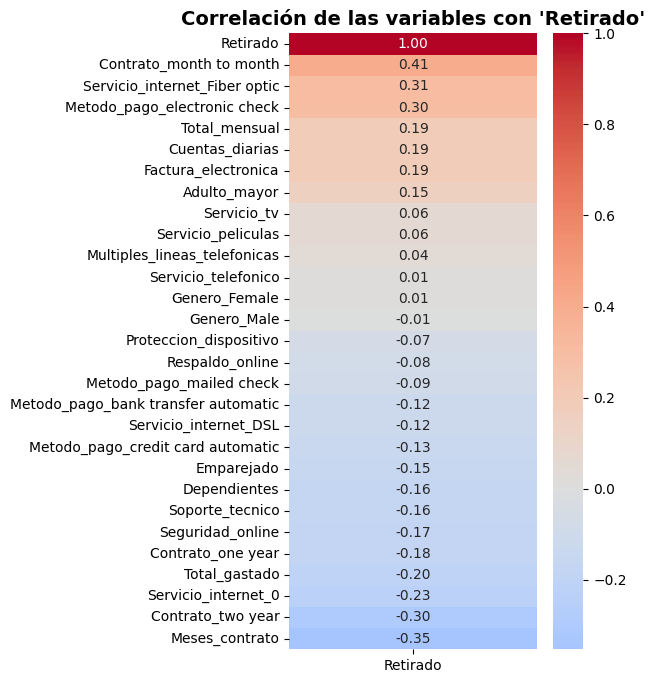

In [13]:
correlacion = df_telecom_codificado.corr()
corr_retirado = correlacion[["Retirado"]].sort_values(by="Retirado", ascending=False)

plt.figure(figsize=(4, 8))
sns.heatmap(corr_retirado, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlación de las variables con 'Retirado'", fontsize=14, fontweight="bold")
plt.show()

El análisis de correlación muestra que algunas variables tienen poca o casi nula relación con la cancelación como: Múltiples líneas telefónicas, Respaldo online, Protección de dispositivo, Servicio de TV, Servicio de películas, Género y Método de pago: mailed check. Por lo que, probablemente no aporten valor significativo al modelo.

Por otro lado, se destacan variables con mayor peso explicativo. Entre las más influyentes en el churn se encuentran:

* **Contrato month-to-month** (correlación positiva fuerte, ≈0.41), lo que confirma que los clientes con contratos mensuales presentan una mayor probabilidad de cancelar.

* **Servicio de internet: Fiber optic** (≈0.31), asociado con una mayor tasa de retiro.

* **Método de pago: electronic check** (≈0.30), también vinculado a mayor cancelación.

* **Meses de contrato** (correlación negativa, ≈-0.35), lo que evidencia que a mayor tiempo de permanencia, menor probabilidad de abandono.

En menor medida, variables como: Total mensual, Factura electrónica y ser Adulto mayor presentan correlaciones positivas con el churn, mientras que variables como Contrato one year/two year, Servicio de internet DSL y Total gastado muestran correlaciones negativas, todas coherentes con los hallazgos exploratorios de la Parte 1.

En conjunto, este análisis confirma que los factores relacionados con el tipo de contrato, método de pago, tiempo de permanencia y tipo de servicio de internet son los que más inciden en la probabilidad de cancelación de clientes en Telecom X.

#### **Análisis Dirigido** ####

Con el fin de profundizar en las posibles causas de la cancelación de clientes, se realiza un análisis dirigido sobre variables que,  suelen estar fuertemente relacionadas con la deserción. En particular, se analizan:

* **Tiempo de contrato × Cancelación:** examinar la relación entre la cantidad de meses de permanencia del cliente y la probabilidad de retiro permite identificar en qué etapas del ciclo de vida ocurre con mayor frecuencia la deserción.

* **Gasto total × Cancelación:** estudiar el gasto acumulado de los clientes en relación con la cancelación permite establecer si los usuarios con menor o mayor inversión presentan diferencias significativas en sus tasas de abandono.

Para este análisis se emplearon *boxplots* y *violinplots*, los cuales permiten visualizar la distribución de los datos en cada grupo, destacando no solo la mediana y los cuartiles, sino también la densidad de observaciones. Estas gráficas resultan especialmente útiles para comparar el comportamiento de los clientes que permanecen frente a los que se retiran, identificando patrones y concentraciones que ayudan a explicar el fenómeno de la cancelación.

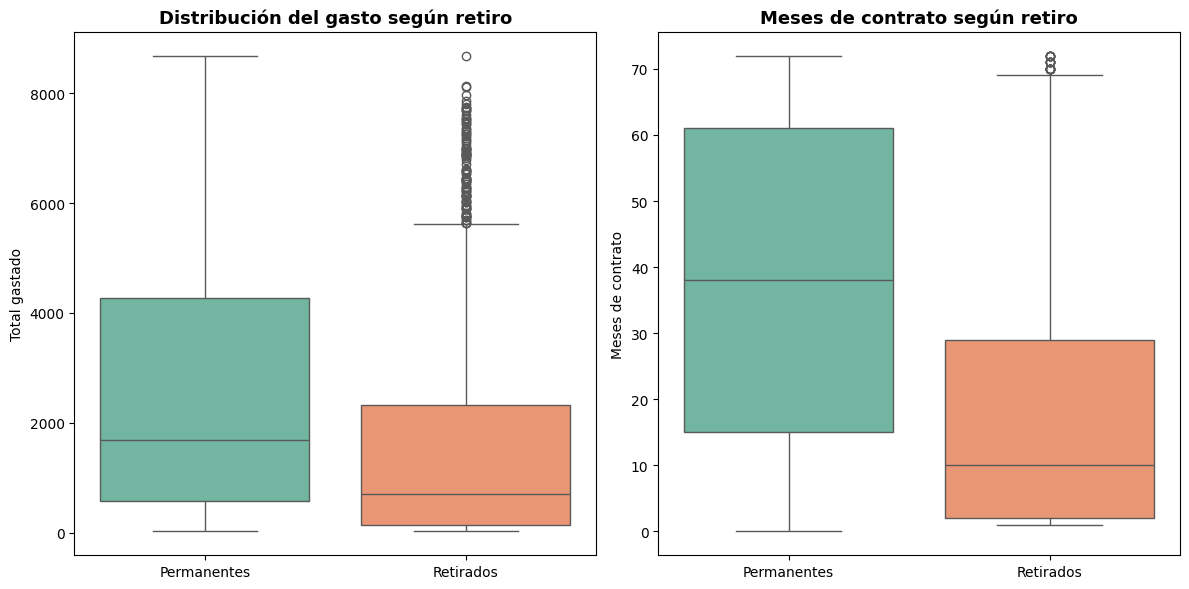

In [49]:
from matplotlib.ticker import FixedLocator
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x="Retirado", y="Total_gastado", data=df_telecom_codificado,
            hue="Retirado", dodge=False,legend=False, palette="Set2",ax=axes[0])
axes[0].set_title("Distribución del gasto según retiro", fontsize=13, fontweight="bold")
axes[0].set_xlabel("")
axes[0].set_ylabel("Total gastado")
axes[0].xaxis.set_major_locator(FixedLocator([0, 1]))
axes[0].set_xticklabels(["Permanentes", "Retirados"])

sns.boxplot(x="Retirado", y="Meses_contrato", data=df_telecom_codificado,
            hue="Retirado", dodge=False, legend=False, palette="Set2",ax=axes[1])
axes[1].set_title("Meses de contrato según retiro", fontsize=13, fontweight="bold")
axes[1].set_xlabel("")
axes[1].set_ylabel("Meses de contrato")
axes[1].xaxis.set_major_locator(FixedLocator([0, 1]))
axes[1].set_xticklabels(["Permanentes", "Retirados"])

plt.tight_layout()
plt.show()


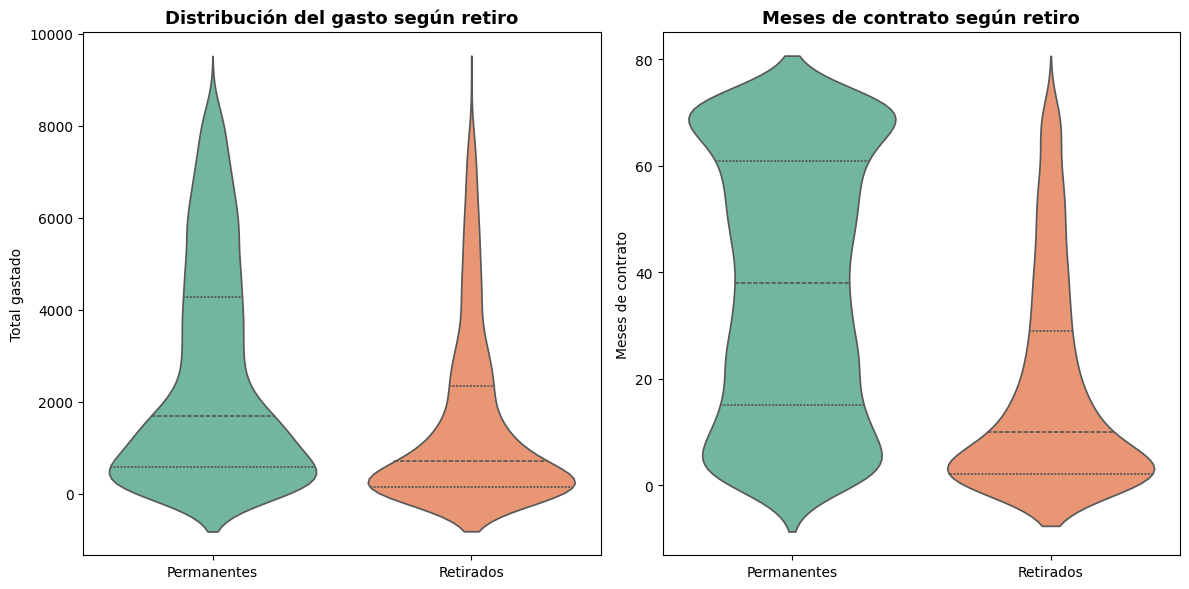

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(x="Retirado", y="Total_gastado", data=df_telecom_codificado,
               hue="Retirado", dodge=False,legend=False,palette="Set2",ax=axes[0],inner="quartile")
axes[0].set_title("Distribución del gasto según retiro", fontsize=13, fontweight="bold")
axes[0].set_xlabel("")
axes[0].set_ylabel("Total gastado")
axes[0].xaxis.set_major_locator(FixedLocator([0, 1]))
axes[0].set_xticklabels(["Permanentes", "Retirados"])


sns.violinplot(x="Retirado", y="Meses_contrato", data=df_telecom_codificado,
               hue="Retirado", dodge=False, legend=False, palette="Set2",ax=axes[1],inner="quartile")
axes[1].set_title("Meses de contrato según retiro", fontsize=13, fontweight="bold")
axes[1].set_xlabel("")
axes[1].set_ylabel("Meses de contrato")
axes[1].xaxis.set_major_locator(FixedLocator([0, 1]))
axes[1].set_xticklabels(["Permanentes", "Retirados"])

plt.tight_layout()
plt.show()

El análisis mediante boxplots y violinplots permite observar diferencias claras entre los clientes que permanecen y los que se retiran.

En cuanto al **gasto total**, los clientes permanentes presentan una mediana de gasto significativamente superior, con una amplia dispersión que refleja distintos niveles de inversión a lo largo del tiempo. Por el contrario, los clientes retirados muestran una mediana considerablemente menor y una fuerte concentración en valores bajos de gasto, aunque existen casos aislados de clientes con alto gasto que también cancelaron, lo que sugiere que una mayor inversión no garantiza necesariamente la permanencia.

Respecto al **tiempo de contrato**, los clientes que permanecen exhiben una mediana cercana a los 40 meses y una distribución amplia, lo que evidencia relaciones de largo plazo con la empresa. En contraste, los retirados presentan una mediana en torno a los 10 meses, confirmando que la mayor parte de las cancelaciones ocurre durante el primer año de servicio. Aunque existen algunos casos de clientes de larga data que se retiran, estos corresponden a valores atípicos y no constituyen la tendencia principal.

En conjunto, estos resultados refuerzan la idea de que tanto el gasto acumulado como, especialmente, el tiempo de contrato son factores determinantes en la probabilidad de cancelación, destacando la necesidad de implementar estrategias de retención en los primeros meses de relación con el cliente.

### **Modelado Predictivo** ###

Para abordar el problema de predicción de cancelación, se decidió entrenar y comparar dos algoritmos de clasificación:

**1. Árbol de Decisión (Decision Tree Classifier)**

**2. Bosque Aleatorio (Random Forest Classifier)**

Dado que la preparación de variables puede influir fuertemente en el desempeño, se plantearon tres versiones de cada modelo:

* **Versión 1**: Entrenamiento con todas las variables del dataset codificado.

* **Versión 2**: Entrenamiento excluyendo aquellas variables que presentaron baja correlación con la variable objetivo.

* **Versión 3**: Entrenamiento únicamente con las variables que mostraron correlación fuerte con la cancelación.

De esta manera, se busca no solo comparar el rendimiento entre algoritmos, sino también analizar el efecto de la selección de variables en la capacidad predictiva de los modelos.

#### **Metodología de Evaluación** ####

Para garantizar una comparación justa y objetiva entre los diferentes modelos predictivos, se definió una metodología común de evaluación.

Las métricas seleccionadas fueron:

* **Accuracy (Exactitud)**: mide la proporción de predicciones correctas sobre el total.

* **Precision (Precisión)**: indica qué proporción de las predicciones positivas fueron realmente correctas.

* **Recall (Sensibilidad)**: refleja la capacidad del modelo para identificar correctamente a los clientes que abandonan el servicio, siendo de especial importancia debido al desbalanceo de clases.

* **F1-score**: media armónica entre precisión y recall, que equilibra ambas métricas en contextos donde el desbalance de clases puede afectar la interpretación de los resultados.

Adicionalmente, se emplearon herramientas gráficas y de validación complementarias:

* **Matriz de confusión**: permite observar los aciertos y errores en cada clase (clientes que permanecen vs. clientes que se retiran).

* **Curva ROC y AUC (Área bajo la curva)**: utilizada para evaluar la capacidad discriminatoria del modelo al diferenciar entre las dos clases.

* **Validación cruzada (K-Fold con k=5)**: proporciona una estimación más robusta del rendimiento al entrenar y evaluar el modelo en diferentes particiones del dataset.

Para sistematizar el proceso de evaluación se definió una función auxiliar en Python, la cual calcula de manera automática las métricas principales (Accuracy, Precision, Recall y F1-score). Esta función fue aplicada en todos los experimentos, asegurando la homogeneidad en la comparación de resultados.

In [16]:
def evaluar_modelo(y_test, y_pred):
    print(f"Precisión (Precision): {precision_score(y_test, y_pred):.4f}")
    print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred):.4f}")
    print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print("------------------------------------------------------")
    print(classification_report(y_test,y_pred))

De esta manera, cada modelo podrá ser evaluado de forma consistente, facilitando la comparación de resultados.

#### **Separación de Variables Predictoras y Objetivo** ####

El siguiente paso consiste en separar las variables en dos conjuntos:

* **Variable objetivo (y)**: corresponde a la columna Retirado, que indica si un cliente canceló o no el servicio.

* **Variables predictoras (X)**: todas las demás columnas, que contienen la información contractual y de servicios de cada cliente.

Sin embargo, con base en el análisis previo de correlación y relevancia de variables, se definieron tres versiones de conjuntos de datos para comparar el desempeño de los modelos:

**1. Versión completa (todas las variables)**: se incluyen todas las variables categóricas y numéricas codificadas, sin eliminar ninguna, para evaluar el modelo en el escenario más amplio.

**2. Versión depurada (sin variables irrelevantes)**: se eliminan aquellas variables que mostraron poca o nula correlación con la cancelación (como Género, TV, Películas, Protección de dispositivo, entre otras).

**3. Versión concentrada (solo variables con fuerte correlación)**: se conservan únicamente las variables que tuvieron la mayor correlación con Retirado, como Meses de contrato, Contrato month-to-month, Internet fibra óptica y Método de pago electronic check.

De esta forma, podremos analizar si tener más información (aunque irrelevante) mejora o empeora el rendimiento, en comparación con modelos más simples pero enfocados en las variables más influyentes

In [17]:
# Versión 1: todas las variables
X_1 = df_telecom_codificado.drop(columns="Retirado", axis=1)
y_1 = df_telecom_codificado["Retirado"]

# Versión 2: sin variables irrelevantes
X_2 = df_telecom_codificado.drop(columns=["Retirado", "Multiples_lineas_telefonicas",
                                             "Respaldo_online","Proteccion_dispositivo", "Servicio_tv",
                                             "Servicio_peliculas", "Genero_Female", "Genero_Male",
                                             "Metodo_pago_mailed check"],axis=1)
y_2 = df_telecom_codificado["Retirado"]

# Versión 3: solo variables más correlacionadas
X_3 = df_telecom_codificado[["Meses_contrato","Metodo_pago_electronic check",
                             "Contrato_month to month","Servicio_internet_Fiber optic"]]
y_3 = df_telecom_codificado["Retirado"]


Para poder evaluar de manera justa el rendimiento de los modelos, es necesario dividir el dataset en dos partes:

* **Conjunto de entrenamiento (train)**: corresponde al 70% de los datos. Se utiliza para ajustar los parámetros internos del modelo.

* **Conjunto de prueba (test)**: corresponde al 30% de los datos. Se reserva para validar la capacidad del modelo de generalizar a datos nuevos.

En este proceso se emplea la función train_test_split de scikit-learn. Además, se utiliza el parámetro stratify=y para garantizar que la proporción de clases (clientes retirados vs. clientes permanentes) se mantenga igual tanto en el conjunto de entrenamiento como en el de prueba. Esto es especialmente importante porque previamente identificamos un desbalanceo de clases, y una separación no estratificada podría sesgar los resultados.

Por último, se fija el parámetro random_state=42 con el fin de asegurar que la división sea reproducible en futuras ejecuciones

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, stratify=y_1, random_state=42)

### **Modelo 1: Árbol de Decisión (Decision Tree Classifier)** ###

#### **Modelo 1.1: Árbol de Decisión (todas las variables categóricas incluidas)** ####

El primer modelo seleccionado fue un Árbol de Decisión, un algoritmo de clasificación que construye reglas de decisión a partir de los atributos de los datos. Este modelo es especialmente útil en problemas como el churn, ya que permite interpretar de manera intuitiva las variables más relevantes en la predicción.

Para esta primera versión (1.1), se entrenó el modelo utilizando todas las variables categóricas disponibles en el dataset, sin descartar aquellas de baja correlación ni seleccionar únicamente las más influyentes. El objetivo de esta aproximación es contar con un modelo de referencia amplio, que permita observar el impacto de todas las variables en conjunto.

Se configuraron los siguientes parámetros en el modelo:

* max_depth=10: limita la profundidad máxima del árbol, evitando que se sobreajuste a los datos de entrenamiento.

* random_state=42: asegura reproducibilidad de resultados.

* class_weight='balanced': ajusta automáticamente el peso de las clases para contrarrestar el desbalanceo entre clientes que permanecen y clientes retirados.

Posteriormente, se ajustó el modelo con los datos de entrenamiento y se obtuvieron predicciones sobre el conjunto de prueba.

In [19]:
modelo_11 = DecisionTreeClassifier(max_depth=10,random_state=42,class_weight='balanced')

modelo_11.fit(X_train, y_train)
y_pred = modelo_11.predict(X_test)

evaluar_modelo(y_test, y_pred)

Precisión (Precision): 0.4766
Sensibilidad (Recall): 0.7451
Exactitud (Accuracy): 0.7151
F1-score: 0.5814
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1552
           1       0.48      0.75      0.58       561

    accuracy                           0.72      2113
   macro avg       0.68      0.72      0.68      2113
weighted avg       0.78      0.72      0.73      2113



📊**Interpretación de métricas**

* ***Precisión (Precision)***: 0.4766. Esto significa que, de todos los clientes que el modelo predijo como retirados, solo un 47% realmente se retiraron. Es decir, el modelo tiende a dar muchos falsos positivos (predice que se retira pero en realidad permanece).

* ***Sensibilidad (Recall)***: 0.7451. Aquí el modelo tuvo un desempeño mucho mejor: detecta el 74% de los clientes que realmente se retiraron. Esto es positivo, ya que en problemas de churn es más costoso no identificar a un cliente que se va que equivocarse con algunos que en realidad permanecen.

* ***Exactitud (Accuracy)***: 0.7151. En general, el modelo clasifica correctamente el 71.5% de los casos. Aunque parece un valor aceptable, recordemos que la base de datos está desbalanceada (más clientes permanecen que se retiran), por lo que la exactitud por sí sola no es suficiente para evaluar el desempeño.

* ***F1-score***: 0.5814. El F1 combina precisión y recall. Su valor de 0.58 indica que, aunque el modelo logra captar muchos casos de clientes retirados (alto recall), lo hace a costa de equivocarse bastante (baja precisión).

**Del classification report**

* Clase 0 (permanecen):

    * Precisión alta (0.88) → cuando el modelo predice que un cliente permanece, acierta en la mayoría de los casos.
        
    * Recall medio (0.70) → detecta bien la mayoría de los que permanecen, pero aún falla en un 30%.

* Clase 1 (retirados):

    * Precisión baja (0.48) → casi la mitad de las veces se equivoca.

    * Recall alto (0.75) → logra captar la mayoría de los clientes que efectivamente se retiran.

En conclusión, este primer modelo tiene un enfoque más “sensible” que “preciso”, es bueno detectando a clientes que se retiran (recall alto), pero comete muchos errores al predecir que alguien se retira cuando en realidad permanece (precisión baja).

Esto puede ser útil en un escenario donde la empresa prefiere no perder clientes en riesgo, aunque implique invertir recursos en algunos que realmente no se iban a retirar.

#### 🟪 **Matriz de Confusión**  ####

Para complementar la interpretación de métricas, se construyó la matriz de confusión del modelo. Esta herramienta permite observar de manera más clara cómo se distribuyen los aciertos y errores en cada clase (clientes que permanecen y clientes que se retiran).

En este caso:

* **Verdaderos Negativos (VN)**: clientes que permanecen y el modelo los clasificó correctamente como “Permanece”.

* **Falsos Positivos (FP)**: clientes que permanecen, pero el modelo los clasificó erróneamente como “Retirado”.

* **Falsos Negativos (FN)**: clientes que se retiran, pero el modelo los predijo como “Permanece”.

* **Verdaderos Positivos (VP)**: clientes que se retiran y fueron correctamente identificados como “Retirado”.

[[1093  459]
 [ 143  418]]


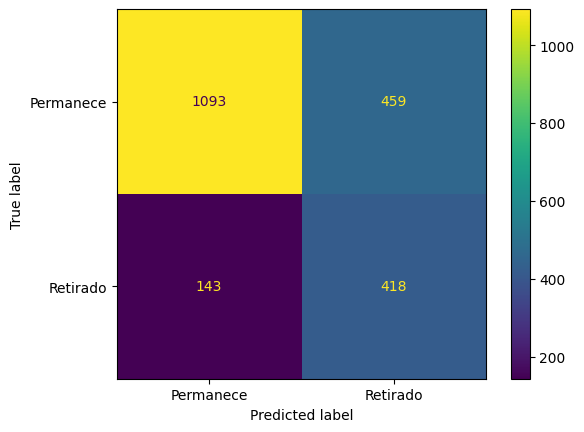

In [20]:
#Matriz de confusión

y_previsto = modelo_11.predict(X_test)
matriz_confusion = confusion_matrix(y_test,y_previsto)
print(matriz_confusion)

visualizacion = ConfusionMatrixDisplay(matriz_confusion,display_labels =["Permanece","Retirado"])
visualizacion.plot();

La matriz de confusión confirma lo visto en las métricas anteriores, que el modelo logra identificar una buena parte de los clientes retirados (recall alto en la clase 1). Sin embargo, también se observa un número considerable de falsos positivos, lo que afecta la precisión.

En términos prácticos, esto significa que la compañía podría llegar a “marcar” como clientes en riesgo de retiro a algunos que en realidad iban a permanecer

#### 📈**Curva ROC y Área Bajo la Curva (AUC)** ####

Para evaluar el desempeño del modelo desde una perspectiva global, se construyó la curva ROC. Esta curva muestra la relación entre la tasa de verdaderos positivos (recall) y la tasa de falsos positivos en distintos umbrales de decisión.

El Área Bajo la Curva (AUC) es un resumen numérico de la capacidad del modelo para discriminar entre clientes que permanecen y clientes que se retiran:

* Un valor cercano a 0.5 indica un modelo sin poder predictivo (equivalente al azar).

* Un valor cercano a 1.0 representa un modelo con alta capacidad discriminativa.

En este caso, el valor obtenido para el AUC confirma que el modelo tiene un desempeño aceptable: es capaz de diferenciar con un grado razonable de certeza entre clientes que abandonan y los que permanecen, aunque todavía existe margen de mejora.

AUC ROC: 0.7517


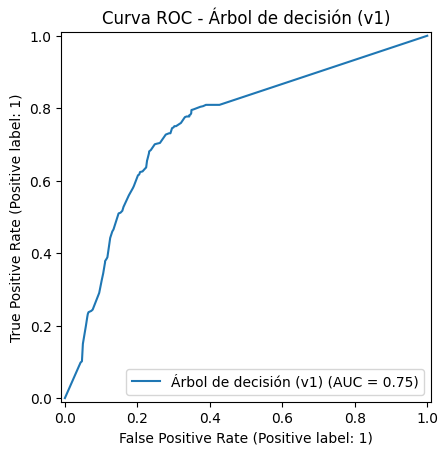

In [22]:
# Probabilidad de la clase positiva (Retirado=1)
y_scores = modelo_11.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, y_scores)
print(f"AUC ROC: {auc_roc:.4f}")

RocCurveDisplay.from_predictions(y_test, y_scores, name="Árbol de decisión (v1)")
plt.title("Curva ROC - Árbol de decisión (v1)")
plt.show()

La curva ROC obtenida muestra que el modelo de Árbol de Decisión tiene una capacidad de discriminación aceptable entre clientes que permanecen y los que se retiran, con un área bajo la curva (AUC) de 0.75. Esto significa que el modelo logra identificar patrones útiles, superando ampliamente el desempeño de un modelo aleatorio (AUC = 0.5), aunque todavía existe margen de mejora en la detección precisa de clientes en riesgo de cancelación.

#### **Validación cruzada e intervalos de confianza** ####

Con el fin de garantizar que el desempeño del modelo no dependa únicamente de una partición específica de entrenamiento y prueba, se aplicó una validación cruzada con 5 particiones (K-Fold). Este procedimiento permite evaluar la estabilidad del modelo en diferentes subconjuntos de datos y obtener una medida más robusta de su rendimiento.

Asimismo, se calculó el promedio de exactitud junto con un intervalo de confianza aproximado, lo que aporta información sobre la variabilidad del modelo y la fiabilidad de los resultados obtenidos.

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_resultados = cross_validate(modelo_11, X_1, y_1, cv=kf, scoring="accuracy")

promedio = cv_resultados["test_score"].mean()
desvio_std = cv_resultados["test_score"].std()
intervalo = [max(0, promedio - 2*desvio_std), min(1, promedio + 2*desvio_std)]

print("Accuracy en cada fold:", np.round(cv_resultados["test_score"], 4))
print(f"Promedio de exactitud: {promedio:.4f}")
print(f"Desvío típico: {desvio_std:.4f}")
print(f"Intervalo de confianza 95%: {intervalo}")


Accuracy en cada fold: [0.7232 0.7154 0.7324 0.7266 0.7237]
Promedio de exactitud: 0.7243
Desvío típico: 0.0055
Intervalo de confianza 95%: [np.float64(0.7132382358409283), np.float64(0.735292717768982)]


El árbol de decisión versión 1 alcanza un promedio de exactitud del 72.4%, con un desvío estándar bajo (0.0055), lo que indica que el modelo es bastante estable en las diferentes particiones de validación cruzada. Además, el intervalo de confianza al 95% se encuentra entre 71.3% y 73.5%, lo cual confirma que el desempeño es consistente y no depende demasiado de cómo se dividan los datos.

#### **Modelo 1.2: Árbol de Decisión (sin variables irrelevantes)** ####

Los siguientes modelos van a tener el código y resultado de los mismos.

Precisión (Precision): 0.4897
Sensibilidad (Recall): 0.7629
Exactitud (Accuracy): 0.7260
F1-score: 0.5965
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1552
           1       0.49      0.76      0.60       561

    accuracy                           0.73      2113
   macro avg       0.69      0.74      0.69      2113
weighted avg       0.79      0.73      0.74      2113

AUC ROC: 0.7627


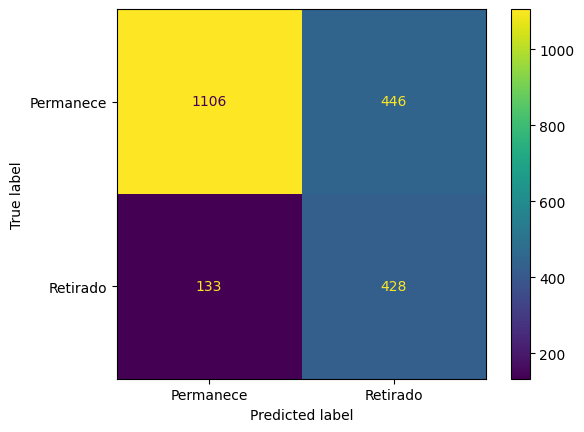

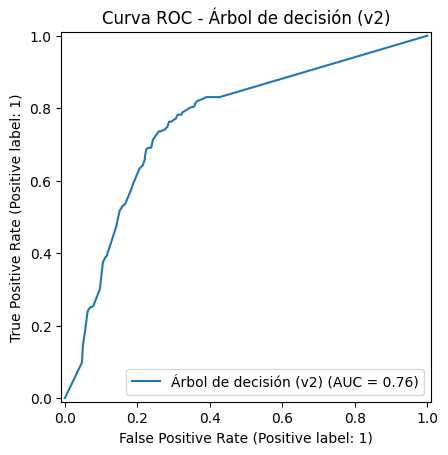

In [23]:
# ===============================
# Modelo 1 - Versión 2
# Árbol de Decisión (sin variables irrelevantes)
# ===============================

# Separación en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_2, y_2, test_size=0.3, stratify=y_2, random_state=42
)

# Definición del modelo
modelo_12 = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight="balanced")

# Entrenamiento
modelo_12.fit(X_train, y_train)

# Predicciones
y_predict = modelo_12.predict(X_test)

# Evaluación
evaluar_modelo(y_test, y_predict)

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_predict)
visualizacion = ConfusionMatrixDisplay(matriz_confusion, display_labels=["Permanece", "Retirado"])
visualizacion.plot();

# ===============================
# Curva ROC con probabilidades
# ===============================
# Probabilidad de la clase positiva (Retirado=1)
y_scores = modelo_12.predict_proba(X_test)[:, 1]

# AUC
auc_roc = roc_auc_score(y_test, y_scores)
print(f"AUC ROC: {auc_roc:.4f}")

# Curva ROC
RocCurveDisplay.from_predictions(y_test, y_scores, name="Árbol de decisión (v2)")
plt.title("Curva ROC - Árbol de decisión (v2)")
plt.show()


📊**Métricas principales:**

* ***Precisión (0.4897)***: la capacidad del modelo para identificar correctamente a los clientes que se retiran sigue siendo baja, es decir, aún genera bastantes falsos positivos.

* ***Recall (0.7629)***: el modelo logra capturar correctamente a una buena parte de los clientes que realmente se retiran. Esto es positivo, porque detecta más de 3 de cada 4 retirados.

* ***Accuracy (0.7260)***: la exactitud global se mantiene estable respecto a la versión anterior (~72%).

* ***F1-score (0.5965)***: mejora respecto a la versión 1 (0.58 → 0.60), lo cual indica un mejor balance entre precisión y recall.

AUC ROC (0.7627): también muestra una leve mejora frente a la versión anterior (0.75 → 0.76), lo que sugiere que eliminar variables irrelevantes ayudó un poco a la capacidad de discriminación.

🟪 **Matriz de confusión:**

* Clientes que permanecen (clase 0):

    * 1106 predichos correctamente.

    * 446 mal clasificados como retirados (falsos positivos).

* Clientes retirados (clase 1):

    * 428 detectados correctamente.

    * 133 mal clasificados como permanecen (falsos negativos).

Se sigue manteniendo un buen recall: la mayoría de retirados son capturados, aunque todavía hay un número considerable de clientes que realmente permanecen y que el modelo clasifica como retirados.

📈 **Curva ROC:**

La curva se mantiene bastante por encima de la diagonal aleatoria, con un AUC de 0.76, lo cual confirma una buena capacidad de separación entre las clases.

**Conclusión:**

Esta versión del modelo mejoró levemente respecto a la versión 1, especialmente en recall, F1-score y AUC. Esto refuerza la idea de que eliminar variables irrelevantes ayuda al modelo a generalizar mejor, sin perder capacidad predictiva. Sin embargo, sigue existiendo un desbalance: muchos clientes que permanecen se clasifican erróneamente como retirados.

In [24]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_resultados = cross_validate(modelo_12, X_2, y_2, cv=kf, scoring="accuracy")

promedio = cv_resultados["test_score"].mean()
desvio_std = cv_resultados["test_score"].std()
intervalo = [max(0, promedio - 2*desvio_std), min(1, promedio + 2*desvio_std)]

print("Accuracy en cada fold:", np.round(cv_resultados["test_score"], 4))
print(f"Promedio de exactitud: {promedio:.4f}")
print(f"Desvío típico: {desvio_std:.4f}")
print(f"Intervalo de confianza 95%: {intervalo}")

Accuracy en cada fold: [0.7289 0.704  0.7189 0.7415 0.7322]
Promedio de exactitud: 0.7251
Desvío típico: 0.0128
Intervalo de confianza 95%: [np.float64(0.6995907463880482), np.float64(0.750650196576014)]


La versión 2 del modelo 1 (árbol de decisión) muestra un rendimiento muy similar al de la versión 1, con una exactitud promedio de 0.7251 frente al 0.7243 anterior, aunque con un desvío típico ligeramente mayor (0.0128 frente a 0.0055), lo que indica más variabilidad entre folds. El intervalo de confianza al 95% ([0.6996, 0.7506]) se mantiene estrecho y en línea con lo esperado. En conjunto, esto sugiere que eliminar variables irrelevantes no perjudica al modelo e incluso aporta una ligera mejora en la generalización.

#### **Modelo 1.3: Árbol de Decisión (Solo con variables con alta correlación)** ####

Precisión (Precision): 0.4888
Sensibilidad (Recall): 0.7790
Exactitud (Accuracy): 0.7250
F1-score: 0.6007
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1552
           1       0.49      0.78      0.60       561

    accuracy                           0.73      2113
   macro avg       0.69      0.74      0.70      2113
weighted avg       0.79      0.73      0.74      2113

AUC ROC: 0.8042


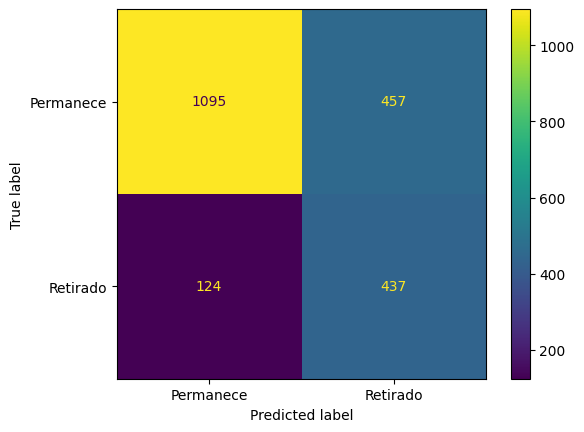

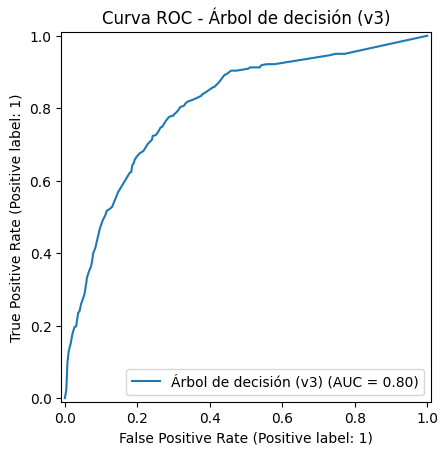

In [25]:
# ===============================
# Modelo 1 - Versión 3
# Árbol de Decisión (Solo variables altamente correlacionadas)
# ===============================

# Separación en train/test
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.3, stratify=y_3, random_state=42)

# Definición del modelo
modelo_13 = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight="balanced")

# Entrenamiento
modelo_13.fit(X_train, y_train)

# Predicciones
y_predict = modelo_13.predict(X_test)

# Evaluación
evaluar_modelo(y_test, y_predict)

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_predict)
visualizacion = ConfusionMatrixDisplay(matriz_confusion, display_labels=["Permanece", "Retirado"])
visualizacion.plot();

# ===============================
# Curva ROC con probabilidades
# ===============================
# Probabilidad de la clase positiva (Retirado=1)
y_scores = modelo_13.predict_proba(X_test)[:, 1]

# AUC
auc_roc = roc_auc_score(y_test, y_scores)
print(f"AUC ROC: {auc_roc:.4f}")

# Curva ROC
RocCurveDisplay.from_predictions(y_test, y_scores, name="Árbol de decisión (v3)")
plt.title("Curva ROC - Árbol de decisión (v3)")
plt.show()


📊 **Métricas principales:**

* ***Precisión (0.4888)***: se mantiene baja, es decir, casi la mitad de las predicciones de clientes retirados resultan ser falsos positivos.

* ***Recall (0.7790)***: muy buen desempeño, incluso un poco mejor que en la versión 2 (0.7629 → 0.7790). Esto significa que el modelo captura correctamente a casi 8 de cada 10 clientes que realmente se retiran.

* ***Accuracy (0.7250)***: estable respecto a las versiones previas (~72%).

* ***F1-score (0.6007)***: ligeramente superior al de la versión 2 (0.5965 → 0.6007). Esto indica un mejor equilibrio entre precisión y recall.

AUC ROC (0.8042): esta es la mejora más clara: el área bajo la curva supera el 0.80, lo que implica que el modelo discrimina mejor entre clientes retirados y no retirados.

🟪 **Matriz de confusión:**

* Clientes que permanecen (clase 0):

    * 1095 predichos correctamente.

    * 457 mal clasificados como retirados (falsos positivos).

* Clientes retirados (clase 1):

    * 437 detectados correctamente.

    * 124 mal clasificados como permanecen (falsos negativos).

La principal mejora frente a la versión 2 está en la reducción de falsos negativos (133 → 124), lo cual refuerza el recall. Sin embargo, los falsos positivos siguen siendo altos.

📈 **Curva ROC**

La curva se acerca más a la esquina superior izquierda que en las versiones anteriores, y el AUC alcanza 0.80, lo que es un umbral sólido para indicar buena capacidad de separación entre clases. Es la mejor curva de las tres versiones.

**Conclusión:**

La versión 3 es la más sólida hasta ahora. Aunque la precisión sigue siendo baja (se predicen demasiados clientes como retirados cuando realmente permanecen), las mejoras en recall, F1-score y especialmente en AUC ROC indican que el modelo ha ganado capacidad de generalización y discriminación.

En términos prácticos, esta versión es útil si el objetivo principal es detectar la mayor cantidad posible de clientes que se retiran (minimizando falsos negativos), aun a costa de contactar a varios clientes que en realidad permanecen.

In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_resultados = cross_validate(modelo_13, X_3, y_3, cv=kf, scoring="accuracy")

promedio = cv_resultados["test_score"].mean()
desvio_std = cv_resultados["test_score"].std()
intervalo = [max(0, promedio - 2*desvio_std), min(1, promedio + 2*desvio_std)]

print("Accuracy en cada fold:", np.round(cv_resultados["test_score"], 4))
print(f"Promedio de exactitud: {promedio:.4f}")
print(f"Desvío típico: {desvio_std:.4f}")
print(f"Intervalo de confianza 95%: {intervalo}")

Accuracy en cada fold: [0.7268 0.7331 0.7317 0.7457 0.7166]
Promedio de exactitud: 0.7308
Desvío típico: 0.0095
Intervalo de confianza 95%: [np.float64(0.7118873126458838), np.float64(0.7497059756307793)]


La versión 3 del modelo 1 (árbol de decisión) presenta un promedio de exactitud de 0.7308, ligeramente superior al de la versión 2 (0.7251). Además, el desvío típico disminuye (0.0095 frente a 0.0128), lo que indica una mayor estabilidad del modelo entre los distintos folds. El intervalo de confianza al 95% [0.7119,0.7497] es algo más estrecho y se mantiene en línea con los valores esperados. En conjunto, estos resultados sugieren que la versión 3 ofrece una mejor generalización y consistencia respecto a las versiones anteriores, consolidándose como la más robusta hasta ahora.

#### **Comparativo de las tres versiones del modelo (Árbol de decisión)** ####

| Métrica / Versión | V1     | V2     | V3     |
| ----------------- | ------ | ------ | ------ |
| **Precisión**     | 0.4766 | 0.4897 | 0.4888 |
| **Recall**        | 0.7451 | 0.7629 | 0.7790 |
| **Accuracy**      | 0.7151 | 0.7260 | 0.7250 |
| **F1-score**      | 0.5814 | 0.5965 | 0.6007 |
| **AUC ROC**       | 0.7500 | 0.7627 | 0.8042 |

#### **Validación Cruzada** ####

| Versión | Promedio Accuracy | Desvío típico | Intervalo 95%     |
| ------- | ----------------- | ------------- | ----------------- |
| **V1**  | 0.7243            | 0.0055        | \[0.713, 0.735]   |
| **V2**  | 0.7251            | 0.0128        | \[0.6996, 0.7506] |
| **V3**  | 0.7308            | 0.0095        | \[0.7119, 0.7497] |


#### **Análisis global** ####

**Versión 1**: el modelo inicial mostró un recall fuerte (0.74), lo cual es clave en churn, pero con una precisión baja (0.47). El AUC de 0.75 ya evidenciaba una capacidad de discriminación aceptable. Su principal ventaja es la estabilidad en la validación cruzada (desvío típico bajo).

**Versión 2**: al eliminar variables irrelevantes, el modelo mantuvo un desempeño similar pero mejoró ligeramente en recall (0.76), F1 (0.60) y AUC (0.76). Sin embargo, la variabilidad aumentó en validación cruzada, lo que sugiere que los resultados dependen más de la partición de datos.

**Versión 3**: es la que muestra el mejor equilibrio global. El recall alcanzó 0.7790, el F1-score 0.6007 y el AUC superó la barrera de 0.80, lo que implica una discriminación mucho más sólida entre clases. Además, la validación cruzada confirma una exactitud promedio mayor (0.7308) y con menor variabilidad que la versión 2.

**Conclusión**:

La versión 3 es la más robusta y generalizable. Aporta un mejor equilibrio entre sensibilidad y precisión, mantiene una exactitud consistente y logra un AUC que refleja una separación clara entre clientes que permanecen y los que se retiran. En un escenario práctico de churn, donde es más importante minimizar falsos negativos (no dejar escapar clientes en riesgo), esta última versión resulta la más recomendable.

###  **Modelo 2: Bosque Aleatorio (Random Forest Classifier)** ###

#### **Modelo 2.1: Bosque Aleatorio (todas las variables categóricas incluidas)** ####

El segundo modelo seleccionado fue un Random Forest, un algoritmo de ensamblado basado en la construcción de múltiples árboles de decisión y la combinación de sus resultados para mejorar la capacidad predictiva. A diferencia de un único árbol, el Random Forest reduce la varianza y el sobreajuste, logrando en general un mejor desempeño en términos de estabilidad y generalización.

Para esta primera versión (2.1), se entrenó el modelo utilizando todas las variables categóricas disponibles en el dataset, sin descartar aquellas de baja correlación ni seleccionar únicamente las más influyentes. El objetivo es contar con una línea base más robusta que el árbol individual, aprovechando la naturaleza agregada del bosque para comparar posteriormente con versiones más depuradas.

Los parámetros principales configurados fueron:

* max_depth=10: limita la profundidad de cada árbol para controlar el sobreajuste.

* random_state=42: asegura la reproducibilidad de resultados.

* class_weight='balanced': ajusta automáticamente el peso de las clases para mitigar el desbalance entre clientes que permanecen y clientes retirados.

Posteriormente, se ajustó el modelo con los datos de entrenamiento y se obtuvieron predicciones sobre el conjunto de prueba.

Precisión (Precision): 0.5475
Sensibilidad (Recall): 0.7094
Exactitud (Accuracy): 0.7672
F1-score: 0.6180
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1552
           1       0.55      0.71      0.62       561

    accuracy                           0.77      2113
   macro avg       0.71      0.75      0.73      2113
weighted avg       0.79      0.77      0.78      2113

AUC ROC: 0.8379


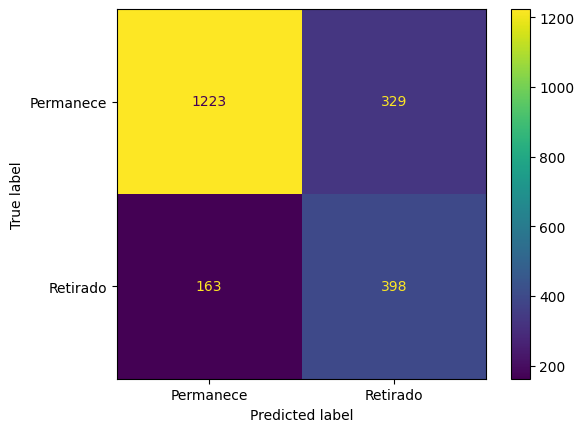

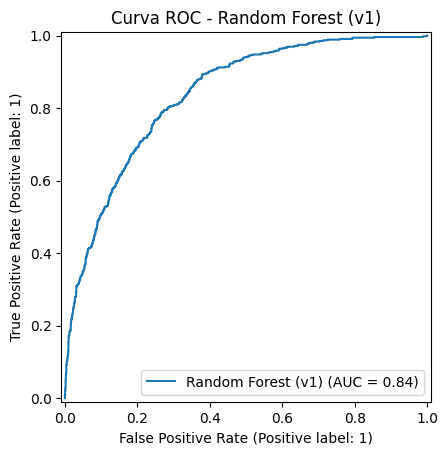

In [27]:
# ===============================
# Modelo 2 - Versión 1
# Random Forest (Todas las variables)
# ===============================

# Separación en train/test
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, stratify=y_1, random_state=42)

# Definición del modelo
modelo_21 = RandomForestClassifier(max_depth=10, random_state=42, class_weight="balanced")

# Entrenamiento
modelo_21.fit(X_train, y_train)

# Predicciones
y_predict = modelo_21.predict(X_test)

# Evaluación
evaluar_modelo(y_test, y_predict)

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_predict)
visualizacion = ConfusionMatrixDisplay(matriz_confusion, display_labels=["Permanece", "Retirado"])
visualizacion.plot();

# ===============================
# Curva ROC con probabilidades
# ===============================
# Probabilidad de la clase positiva (Retirado=1)
y_scores = modelo_21.predict_proba(X_test)[:, 1]

# AUC
auc_roc = roc_auc_score(y_test, y_scores)
print(f"AUC ROC: {auc_roc:.4f}")

# Curva ROC
RocCurveDisplay.from_predictions(y_test, y_scores, name="Random Forest (v1)")
plt.title("Curva ROC - Random Forest (v1)")
plt.show()

📊 **Métricas principales:**

* ***Precisión (0.5475)***: el modelo mejora frente al árbol de decisión (V1 ≈ 0.48), pero todavía predice falsos positivos de manera considerable (clientes que permanecen pero son clasificados como retirados).

* ***Recall (0.7094)***: captura correctamente al 71% de los clientes retirados. Es un valor un poco más bajo que en el árbol, pero sigue siendo sólido.

* ***Accuracy (0.7672)***: supera claramente al árbol (71–72%), alcanzando un 76.7% de exactitud global.

* ***F1-score (0.6180)***: también mejora frente al árbol (0.58), mostrando un mejor balance entre precisión y recall.

AUC ROC (0.8379): muy buen resultado, considerablemente más alto que el árbol (0.75), lo que refleja una mayor capacidad de discriminación entre las clases.

🟪 **Matriz de confusión:**

* Clientes que permanecen (clase 0):

    * 1223 predichos correctamente.

    * 329 mal clasificados como retirados (falsos positivos).

* Clientes retirados (clase 1):

    * 398 detectados correctamente.

    * 163 mal clasificados como permanecen (falsos negativos).

El modelo reduce notablemente los falsos positivos respecto al árbol, aunque a costa de un ligero aumento en los falsos negativos. Esto explica la mayor precisión y el recall un poco más bajo.

📈 **Curva ROC**

La curva se eleva más que en el árbol, con un AUC de 0.84, lo que indica una discriminación mucho más clara. El Random Forest, al promediar múltiples árboles, logra suavizar los errores y mejorar la separación entre clases.

**Conclusión:**

El Random Forest versión 1 supera de manera clara al Árbol de Decisión versión 1 en términos de accuracy, F1-score y AUC ROC, ofreciendo un modelo más equilibrado y con mejor capacidad de generalización. Aunque el recall es un poco más bajo, la reducción de falsos positivos lo convierte en un modelo más útil cuando se busca minimizar errores en la clasificación de clientes que permanecen, manteniendo aún una buena capacidad de detección de retirados.

In [28]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_resultados = cross_validate(modelo_21, X_1, y_1, cv=kf, scoring="accuracy")

promedio = cv_resultados["test_score"].mean()
desvio_std = cv_resultados["test_score"].std()
intervalo = [max(0, promedio - 2*desvio_std), min(1, promedio + 2*desvio_std)]

print("Accuracy en cada fold:", np.round(cv_resultados["test_score"], 4))
print(f"Promedio de exactitud: {promedio:.4f}")
print(f"Desvío típico: {desvio_std:.4f}")
print(f"Intervalo de confianza 95%: {intervalo}")

Accuracy en cada fold: [0.7771 0.7764 0.7722 0.7933 0.7756]
Promedio de exactitud: 0.7789
Desvío típico: 0.0074
Intervalo de confianza 95%: [np.float64(0.764140282103609), np.float64(0.7937217170576272)]


La validación cruzada muestra un promedio de exactitud de 0.7789, lo que confirma la mejora sustancial frente al Árbol de Decisión (≈0.72). El desvío típico es bajo (0.0074), lo que refleja una buena estabilidad del modelo en las diferentes particiones. Además, el intervalo de confianza al 95% [0.7641,0.7937] se ubica consistentemente por encima de los valores logrados por el Árbol de Decisión, lo que refuerza la conclusión de que el Random Forest ofrece un rendimiento más sólido y generalizable desde el inicio.

#### **Modelo 2.2: Bosque Aleatorio (sin variables)** ####

Precisión (Precision): 0.5446
Sensibilidad (Recall): 0.7184
Exactitud (Accuracy): 0.7657
F1-score: 0.6195
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1552
           1       0.54      0.72      0.62       561

    accuracy                           0.77      2113
   macro avg       0.71      0.75      0.73      2113
weighted avg       0.79      0.77      0.77      2113

AUC ROC: 0.8417


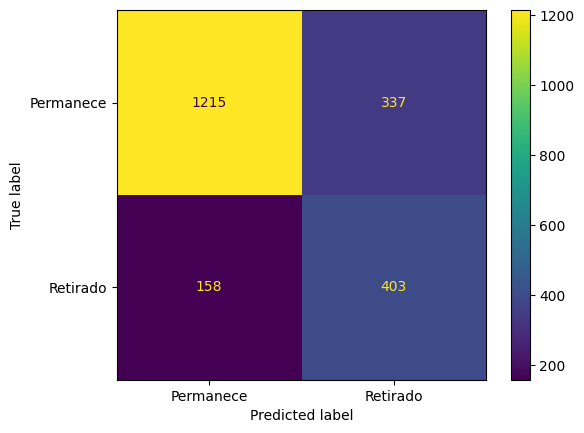

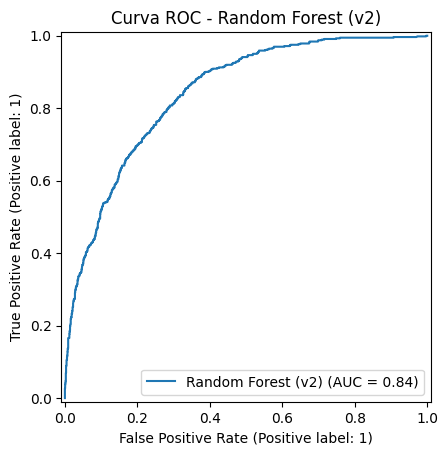

In [29]:
# ===============================
# Modelo 2 - Versión 2
# Random Forest (Sin variables poco correlacionadas)
# ===============================

# Separación en train/test
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, stratify=y_2, random_state=42)

# Definición del modelo
modelo_22 = RandomForestClassifier(max_depth=10, random_state=42, class_weight="balanced")

# Entrenamiento
modelo_22.fit(X_train, y_train)

# Predicciones
y_predict = modelo_22.predict(X_test)

# Evaluación
evaluar_modelo(y_test, y_predict)

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_predict)
visualizacion = ConfusionMatrixDisplay(matriz_confusion, display_labels=["Permanece", "Retirado"])
visualizacion.plot();

# ===============================
# Curva ROC con probabilidades
# ===============================
# Probabilidad de la clase positiva (Retirado=1)
y_scores = modelo_22.predict_proba(X_test)[:, 1]

# AUC
auc_roc = roc_auc_score(y_test, y_scores)
print(f"AUC ROC: {auc_roc:.4f}")

# Curva ROC
RocCurveDisplay.from_predictions(y_test, y_scores, name="Random Forest (v2)")
plt.title("Curva ROC - Random Forest (v2)")
plt.show()

📊 **Métricas principales:**

* ***Precisión (0.5446)***: prácticamente igual a la versión 1 (0.5475 → 0.5446). El modelo sigue generando falsos positivos, aunque mantiene un equilibrio aceptable.

* ***Recall (0.7184)***: mejora ligeramente respecto a la versión 1 (0.7094 → 0.7184), capturando a más clientes que efectivamente se retiran.

* ***Accuracy (0.7657)***: se mantiene estable (0.7672 → 0.7657), mostrando que la eliminación de variables no afecta negativamente la exactitud global.

* ***F1-score (0.6195)***: muy similar a la versión 1 (0.6180 → 0.6195), lo que indica un equilibrio prácticamente idéntico entre precisión y recall.

AUC ROC (0.8417): se conserva en el mismo nivel alto que la versión 1 (~0.84), confirmando una muy buena capacidad de discriminación.

🟪 **Matriz de confusión:**

* Clientes que permanecen (clase 0):

    * 1215 clasificados correctamente.

    * 337 mal clasificados como retirados (falsos positivos).

* Clientes retirados (clase 1):

    * 403 detectados correctamente.

    * 158 mal clasificados como permanecen (falsos negativos).

El modelo logra un pequeño aumento en verdaderos positivos (403 vs. 398 en la versión 1), lo que justifica el ligero incremento en recall. Los falsos positivos se mantienen en un nivel similar.

📈 Curva ROC

La curva ROC se mantiene prácticamente igual a la versión 1, con un AUC de 0.84, confirmando que la eliminación de variables no perjudica la capacidad del modelo para separar las clases.

**Conclusión**

El Random Forest versión 2 mantiene un rendimiento muy similar al de la versión 1. La eliminación de variables irrelevantes no reduce el desempeño, e incluso aporta una leve mejora en recall, lo cual es importante en problemas de churn. La estabilidad del AUC confirma que el modelo sigue teniendo una fuerte capacidad discriminativa. En conjunto, esta versión muestra que simplificar el conjunto de variables no compromete la calidad del modelo y puede facilitar su interpretación.

In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_resultados = cross_validate(modelo_22, X_2, y_2, cv=kf, scoring="accuracy")

promedio = cv_resultados["test_score"].mean()
desvio_std = cv_resultados["test_score"].std()
intervalo = [max(0, promedio - 2*desvio_std), min(1, promedio + 2*desvio_std)]

print("Accuracy en cada fold:", np.round(cv_resultados["test_score"], 4))
print(f"Promedio de exactitud: {promedio:.4f}")
print(f"Desvío típico: {desvio_std:.4f}")
print(f"Intervalo de confianza 95%: {intervalo}")

Accuracy en cada fold: [0.7708 0.7644 0.7693 0.7805 0.7749]
Promedio de exactitud: 0.7720
Desvío típico: 0.0054
Intervalo de confianza 95%: [np.float64(0.761096477863885), np.float64(0.7828511155292371)]


La validación cruzada muestra un promedio de exactitud de 0.7720, apenas por debajo del obtenido en la versión 1 (0.7789). Sin embargo, el desvío típico disminuye a 0.0054 (frente a 0.0074 en la versión 1), lo que indica una mayor estabilidad del modelo entre las diferentes particiones. El intervalo de confianza al 95% [0.7611,0.7829] es más estrecho y consistente, lo que refuerza la idea de que la reducción de variables no solo no perjudica, sino que aporta robustez al modelo en términos de generalización.

#### **Modelo 2.3: Bosque Aleatorio (Solo variables altamente correlacionales)** ####

Precisión (Precision): 0.5054
Sensibilidad (Recall): 0.7540
Exactitud (Accuracy): 0.7388
F1-score: 0.6052
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1552
           1       0.51      0.75      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.74      0.70      2113
weighted avg       0.79      0.74      0.75      2113

AUC ROC: 0.8092


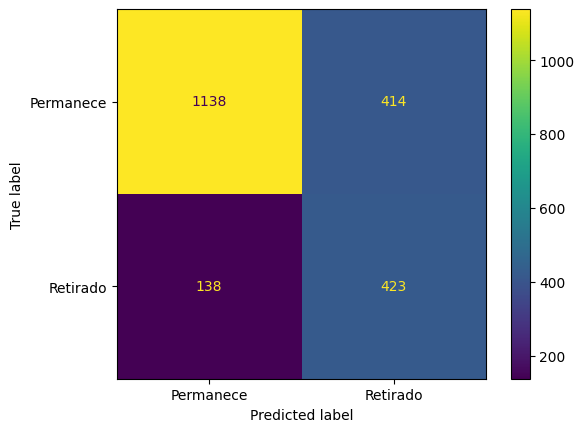

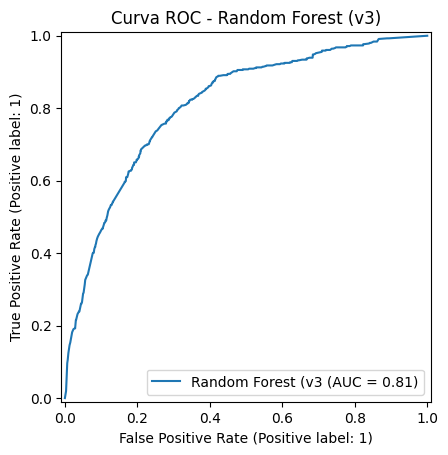

In [31]:
# ===============================
# Modelo 2 - Versión 3
# Random Forest (solo variables altamente correlacionadas)
# ===============================

# Separación en train/test
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.3, stratify=y_3, random_state=42)

# Definición del modelo
modelo_23 = RandomForestClassifier(max_depth=10, random_state=42, class_weight="balanced")

# Entrenamiento
modelo_23.fit(X_train, y_train)

# Predicciones
y_predict = modelo_23.predict(X_test)

# Evaluación
evaluar_modelo(y_test, y_predict)

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_predict)
visualizacion = ConfusionMatrixDisplay(matriz_confusion, display_labels=["Permanece", "Retirado"])
visualizacion.plot();

# ===============================
# Curva ROC con probabilidades
# ===============================
# Probabilidad de la clase positiva (Retirado=1)
y_scores = modelo_23.predict_proba(X_test)[:, 1]

# AUC
auc_roc = roc_auc_score(y_test, y_scores)
print(f"AUC ROC: {auc_roc:.4f}")

# Curva ROC
RocCurveDisplay.from_predictions(y_test, y_scores, name="Random Forest (v3")
plt.title("Curva ROC - Random Forest (v3)")
plt.show()

📊 **Métricas principales:**

* ***Precisión (0.5054)***: se reduce respecto a las versiones anteriores (0.54 → 0.50), lo que indica que aumenta la proporción de falsos positivos (clientes que permanecen pero son clasificados como retirados).

* ***Recall (0.7540)***: mejora frente a las versiones previas (0.71 → 0.75), capturando una mayor proporción de clientes que realmente se retiran.

* ***Accuracy (0.7388)***: cae frente a la versión 1 (0.7672) y la versión 2 (0.7657), situándose en un 73.9%.

* ***F1-score (0.6052)***: apenas más bajo que en las versiones previas (~0.62), debido al descenso en precisión compensado por la mejora en recall.

AUC ROC (0.8092): desciende respecto a las versiones anteriores (~0.84 → 0.81), lo que indica una menor capacidad de discriminación global.

🟪 **Matriz de confusión:**

* Clientes que permanecen (clase 0):

    * 1138 clasificados correctamente.

    * 414 mal clasificados como retirados (falsos positivos).

* Clientes retirados (clase 1):

    * 423 detectados correctamente.

     * 138 mal clasificados como permanecen (falsos negativos).

La principal diferencia frente a las versiones anteriores está en el aumento de falsos positivos (337 → 414), lo que reduce la precisión. A cambio, el modelo logra detectar más retirados (403 → 423), lo que explica el aumento en recall.

📈 **Curva ROC**

El área bajo la curva baja a 0.81, lo cual sigue siendo bueno, pero inferior al rendimiento de las versiones 1 y 2 (0.84). La capacidad de separar entre clientes que se retiran y permanecen se ve debilitada.

**Conclusión**

La Versión 3 del Random Forest cambia el balance del modelo: prioriza el recall sobre la precisión. Esto lo hace más agresivo en la detección de clientes en riesgo (detecta más retirados), pero a costa de marcar a muchos clientes que realmente permanecen como retirados. La exactitud global y el AUC se ven reducidos respecto a las versiones anteriores, por lo que esta configuración puede ser útil si la empresa prefiere no dejar escapar clientes en riesgo, aun sabiendo que atenderá más falsos positivos.

In [32]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_resultados = cross_validate(modelo_23, X_3, y_3, cv=kf, scoring="accuracy")

promedio = cv_resultados["test_score"].mean()
desvio_std = cv_resultados["test_score"].std()
intervalo = [max(0, promedio - 2*desvio_std), min(1, promedio + 2*desvio_std)]

print("Accuracy en cada fold:", np.round(cv_resultados["test_score"], 4))
print(f"Promedio de exactitud: {promedio:.4f}")
print(f"Desvío típico: {desvio_std:.4f}")
print(f"Intervalo de confianza 95%: {intervalo}")

Accuracy en cada fold: [0.7331 0.7417 0.7431 0.7543 0.7259]
Promedio de exactitud: 0.7396
Desvío típico: 0.0096
Intervalo de confianza 95%: [np.float64(0.7203748930028289), np.float64(0.7588245714787505)]


La validación cruzada arroja un promedio de exactitud de 0.7396, lo que representa una caída respecto a las versiones 1 (0.7789) y 2 (0.7720). Además, el desvío típico es mayor (0.0096), mostrando más variabilidad en los resultados según la partición de los datos. El intervalo de confianza al 95% [0.7204,0.7588] es más bajo y amplio que en las versiones anteriores, lo que indica menor consistencia en la generalización.

En conjunto, estos resultados confirman que la versión 3 sacrifica estabilidad y exactitud global en favor de un mayor recall. Es decir, el modelo se vuelve más sensible para identificar clientes en riesgo, pero menos confiable en términos de precisión y consistencia.

#### **Comparativo de las tres versiones del modelo (Random Forest)** ####

| Métrica / Versión | V2.1   | V2.2   | V2.3   |
| ----------------- | ------ | ------ | ------ |
| **Precisión**     | 0.5475 | 0.5446 | 0.5054 |
| **Recall**        | 0.7094 | 0.7184 | 0.7540 |
| **Accuracy**      | 0.7672 | 0.7657 | 0.7388 |
| **F1-score**      | 0.6180 | 0.6195 | 0.6052 |
| **AUC ROC**       | 0.8379 | 0.8417 | 0.8092 |


#### **Validación cruzada** ####

| Versión  | Promedio Accuracy | Desvío típico | Intervalo 95%     |
| -------- | ----------------- | ------------- | ----------------- |
| **V2.1** | 0.7789            | 0.0074        | \[0.7641, 0.7937] |
| **V2.2** | 0.7720            | 0.0054        | \[0.7611, 0.7829] |
| **V2.3** | 0.7396            | 0.0096        | \[0.7204, 0.7588] |

### **Análisis global** ###

**Versión 2.1** (todas las variables): es la más fuerte en términos de accuracy y AUC (0.84), mostrando un muy buen balance entre precisión y recall. Su validación cruzada también fue alta (0.7789), aunque con algo de variabilidad.

**Versión 2.2** (variables irrelevantes eliminadas): mantiene prácticamente el mismo rendimiento que la versión 1, con un ligero aumento en recall (0.7184) y la mayor estabilidad en validación cruzada (desvío típico 0.0054, el más bajo). Esto indica que es la versión más consistente.

**Versión 2.3** (optimizada): cambia la estrategia: gana en recall (0.7540), pero pierde en precisión, accuracy y AUC. Además, su validación cruzada muestra menor estabilidad (0.7396 ± 0.0096). Se vuelve un modelo más agresivo en detectar retirados, pero menos confiable en generalización.

#### **Conclusión final** ####

El Random Forest versión 2.1 es el que logra el mejor rendimiento global y discriminación, mientras que la versión 2.2 es la más estable y consistente para generalizar en nuevos datos. En cambio, la versión 2.3 se perfila como la opción más adecuada en escenarios donde la prioridad absoluta sea maximizar la detección de clientes en riesgo (recall alto), aun sacrificando precisión y exactitud global

## **Conclusiones: Árbol de Decisión vs. Random Forest** ##

#### **1. Árbol de Decisión (Modelo 1, versiones 1–3)** ####

El árbol mostró un patrón claro:

* Recall alto (0.74–0.78): muy sensible para detectar clientes que se retiran.

* Precisión baja (~0.48): muchos falsos positivos.

* Accuracy estable (~0.72): con mejoras leves en las versiones 2 y 3.

* AUC moderado (0.75 → 0.80): una capacidad de discriminación aceptable, que mejora cuando se eliminan variables irrelevantes.

* Validación cruzada: osciló en torno al 72–73%, con la versión 3 mostrando mayor consistencia y mejor generalización.

En síntesis, los árboles son modelos más simples e interpretables, adecuados cuando la prioridad es explicar decisiones y capturar la mayoría de clientes en riesgo, pero sacrifican precisión y generan muchos falsos positivos.

#### **2. Random Forest (Modelo 2, versiones 1–3)** ####

El bosque aleatorio superó al árbol en casi todos los aspectos:

* Mayor accuracy (0.74–0.77) en las versiones 1 y 2.

* Mayor F1-score (~0.62), lo que refleja un mejor balance entre recall y precisión.

* AUC claramente superior (0.84 frente a 0.75–0.80 en el árbol): separa mejor las clases.

* Versión 2.1 (todas las variables): mejor rendimiento global, con recall aceptable (0.71) y AUC alto.

* Versión 2.2 (sin variables irrelevantes): casi idéntico desempeño al 2.1, pero más estable y consistente en validación cruzada (0.772 ± 0.0054).

* Versión 2.3 (optimizada): priorizó recall (0.75) a costa de precisión y AUC (0.81), con menor estabilidad.

En resumen, el Random Forest ofrece un balance superior entre sensibilidad y precisión, con mejor capacidad de generalización y robustez frente al sobreajuste.

#### **3. Comparación global** ####

* Recall (sensibilidad): Ambos modelos detectan bien clientes retirados, pero el árbol llega a niveles más altos (0.78), mientras que el Random Forest es más equilibrado.

* Precisión: El Random Forest logra mejorar la precisión (0.55 frente a 0.48), reduciendo falsos positivos respecto al árbol.

* Accuracy: Random Forest supera claramente al árbol (~0.77 vs. ~0.72).

* AUC: Random Forest gana con diferencia (0.84 vs. 0.80 máximo en árbol), mostrando una discriminación más fuerte entre clases.

* Estabilidad: Las validaciones cruzadas confirman que el Random Forest (V2.2) es el más consistente y confiable para generalizar.

### **✅ Conclusión final** ###

* Si la prioridad es explicabilidad y sencillez, el Árbol de Decisión sigue siendo una opción válida, sobre todo en entornos donde se quiera detectar la mayoría de clientes retirados aunque se asuman muchos falsos positivos.

* Si la prioridad es rendimiento predictivo y robustez, el Random Forest es claramente superior. La Versión 2.2 se perfila como la más recomendable, ya que logra un buen balance entre sensibilidad, precisión y estabilidad.

En contextos de negocio donde es crítico no perder clientes en riesgo, puede considerarse la Versión 2.3 del Random Forest, que maximiza recall aun sacrificando exactitud y precisión.

En otras palabras:

* Árbol → más simple, más recall, menos preciso.

* Bosque → más robusto, mejor equilibrio, mejor generalización.

## **Conclusión Final (ajustada al objetivo de la empresa)** ##

#### **Árbol de Decisión (Modelo 1)** ####

* Pros: alcanza recall muy alto (hasta 0.78), lo que significa que detecta la gran mayoría de clientes en riesgo.

* Contras: su precisión es baja (~0.48), lo que implica muchos falsos positivos (clientes marcados como en riesgo que realmente iban a permanecer). Esto generaría costes innecesarios en campañas de retención.

Útil si la empresa prioriza maximizar recall a toda costa, aun con inversiones adicionales en clientes no realmente en riesgo.

#### **Random Forest (Modelo 2)** ####

* Pros: logra un balance superior: recall en torno a 0.71–0.75, pero con mejor precisión (0.54–0.55), más accuracy global (~0.77) y un AUC elevado (0.84). Además, la versión 2.2 fue la más estable en validación cruzada.

* Contras: en su versión optimizada (2.3), aunque mejora el recall (0.75), pierde estabilidad y precisión, lo que puede generar ruido en producción.

### **✅ Recomendación** ###

Dado que la empresa busca anticiparse a la cancelación y diseñar estrategias de retención más efectivas, el modelo más alineado con este objetivo es:

    Random Forest, Versión 2.2 (sin variables irrelevantes).

Ofrece un buen recall (0.72), lo que garantiza detectar a la mayoría de los clientes en riesgo. Manteniendo una precisión superior al árbol (0.54 vs. 0.48), reduciendo falsos positivos y por ende los costes de campañas innecesarias.Además, su AUC de 0.84 muestra una excelente capacidad para discriminar entre clientes que se retiran y los que permanecen.

Es el modelo más estable en validación cruzada, lo cual asegura confiabilidad al desplegarlo en un entorno real.

**En conclusión**: el Random Forest V2.2 logra el mejor equilibrio entre detectar a los clientes en riesgo (recall alto) y minimizar falsas alarmas (precisión aceptable), lo que se traduce en una herramienta práctica y eficiente para la estrategia de retención de la empresa.

**Autor:** Dairo Martínez  
  
**Descripción:** Este notebook presenta dos modelos de Machine Learning, los cuales tienen como objetivo identificar posibles nuevos clientes con mayor probabilidad de cancelar el servicio que ofrece la compañia Telecom X.